### 説明
* MIRUのスライド準備
* reward.pklの値のpngを作成する。
* シフトのMSEの値を整理する。

In [9]:
import pickle
import sys
import os
sys.path.append(
    os.path.dirname(os.path.abspath('.'))
)
from src.view_train_reward import moving_average
from matplotlib import pyplot as plt
import japanize_matplotlib

### 行動集合を増やした場合の報酬の推移をそれぞれ別々のaxで可視化した結果

0


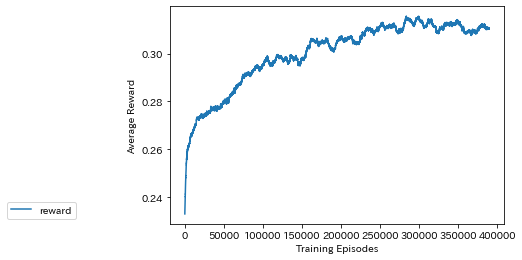

3


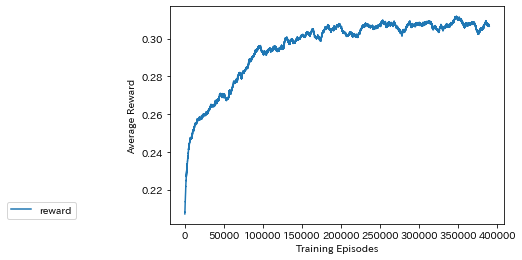

9


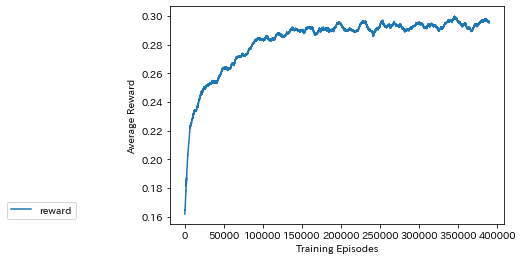

30


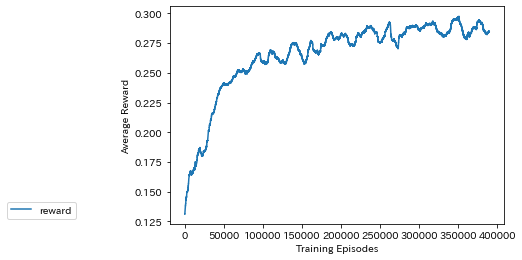

50


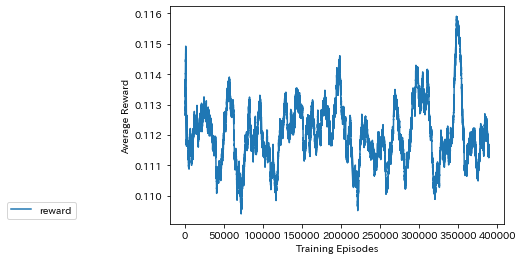

In [2]:
fmt = 'udlr8_extra%d/channel02_weight005_seed00'

# for i in [3, 6, 9, 12, 15, 30, 50]:

def to_png(result_path):
    fig = plt.figure()
    ax = plt.subplot(111)
    ma = show_reward(ax, dir_path=result_path, mono=False, n=10000, label='reward')
    plt.show()
    fig.savefig(os.path.join(result_path, 'reward.png'))

for i in [0, 3, 9, 30, 50]:
    print(i)
    to_png('results/action_add2/' + (fmt % i))

In [4]:
import numpy as np
n = 32
np.random.seed(0)
np.random.randint(3, 10, (n, 2))

array([[7, 8],
       [3, 6],
       [6, 6],
       [4, 6],
       [8, 5],
       [7, 9],
       [3, 3],
       [7, 5],
       [4, 9],
       [9, 3],
       [4, 8],
       [4, 8],
       [3, 4],
       [7, 6],
       [3, 6],
       [8, 9],
       [3, 5],
       [6, 3],
       [4, 6],
       [8, 6],
       [6, 9],
       [3, 4],
       [4, 4],
       [3, 5],
       [7, 6],
       [9, 6],
       [5, 7],
       [5, 3],
       [3, 7],
       [8, 8],
       [9, 3],
       [7, 4]])

0
10
20
30
32
40
50


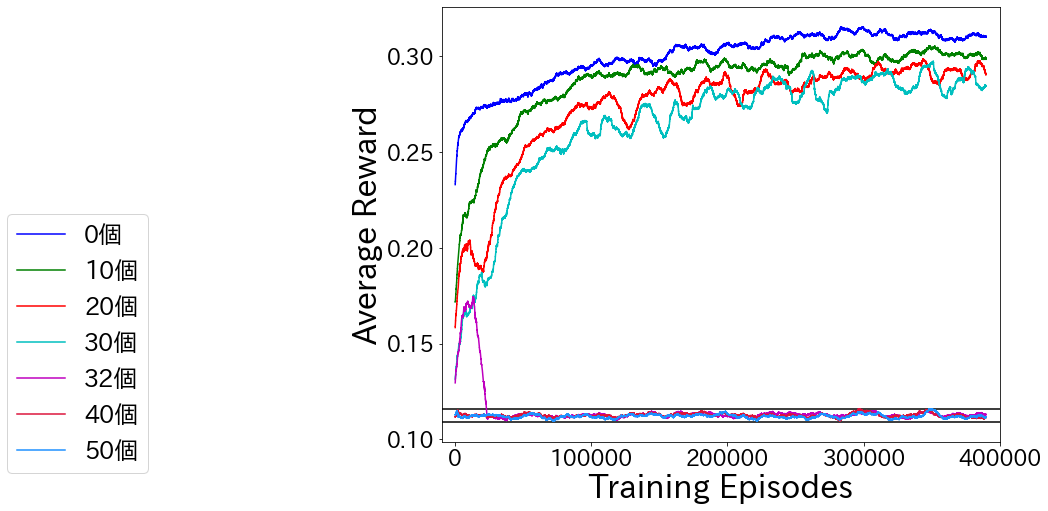

40
50


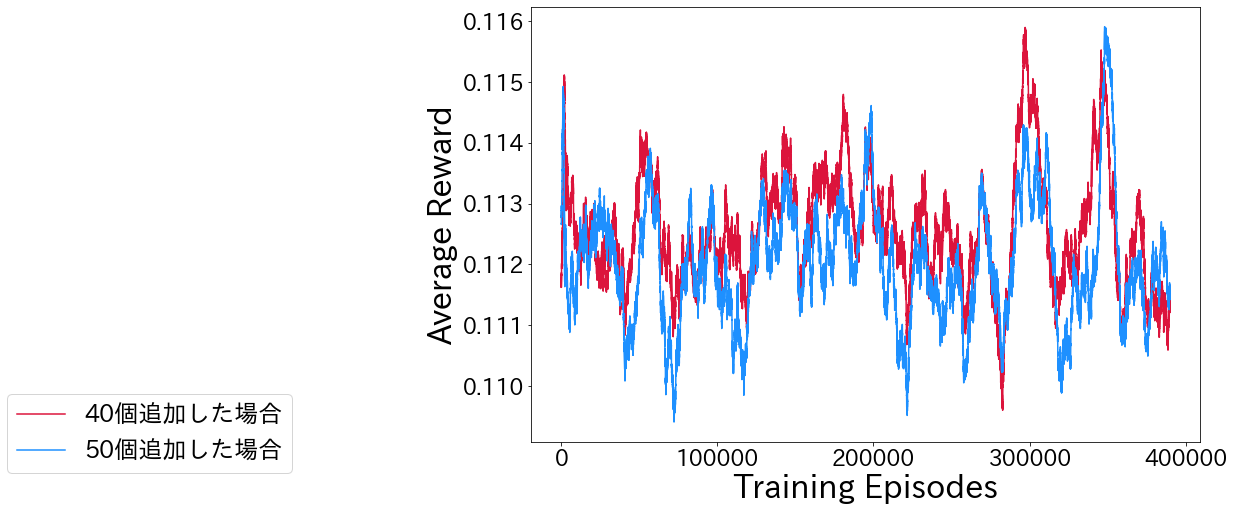

In [42]:
from matplotlib.ticker import MultipleLocator
fmt = 'udlr8_extra%d/channel02_weight005_seed00'

# for i in [3, 6, 9, 12, 15, 30, 50]:

def show_reward(ax, dir_path, n=1000, label='', head=None, mono=True, c='c'):
    if mono:
        fig, ax = plt.add_subplot(111)
    dir_path = os.path.abspath(dir_path)
    
    fs = 32
    ax.set_xlabel('Training Episodes', fontsize=fs)
    ax.set_ylabel('Average Reward', fontsize=fs)
    with open(os.path.join(dir_path, 'reward.pkl'), 'rb') as f:
        reward = pickle.load(f)
    ma = moving_average(reward, n=n)
    ax.plot(ma, label=label, color=c)
    ax.xaxis.set_major_locator(MultipleLocator(100000))
    ax.legend(bbox_to_anchor=(-0.8, -0.1), loc='lower left', fontsize=fs - 8)
    if mono:
        plt.show()
    return ma

def to_png(result_path, ax, label, c='c'):
    ma = show_reward(ax, dir_path=result_path, mono=False, n=10000, label=label, c=c)
    
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
xmin, xmax = (-10000, 400000)
ax.set_xlim(xmin, xmax)
ax.axhline(y=0.116, xmin=xmin, xmax=xmax, color='k')
ax.axhline(y=0.109, xmin=xmin, xmax=xmax, color='k')

colors = ['b', 'g', 'r', 'c', 'm', 'crimson', 'dodgerblue']
for c, i in zip(colors, [0, 10, 20, 30, 32, 40, 50]):
    print(i)
    to_png('results/action_add2/' + (fmt % i), ax, ('%d個' % i), c=c)
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
colors = ['crimson', 'dodgerblue']
for c, i in zip(colors, [40, 50]):
    print(i)
    to_png('results/action_add2/' + (fmt % i), ax, ('%d個追加した場合' % i), c=c)
plt.show()

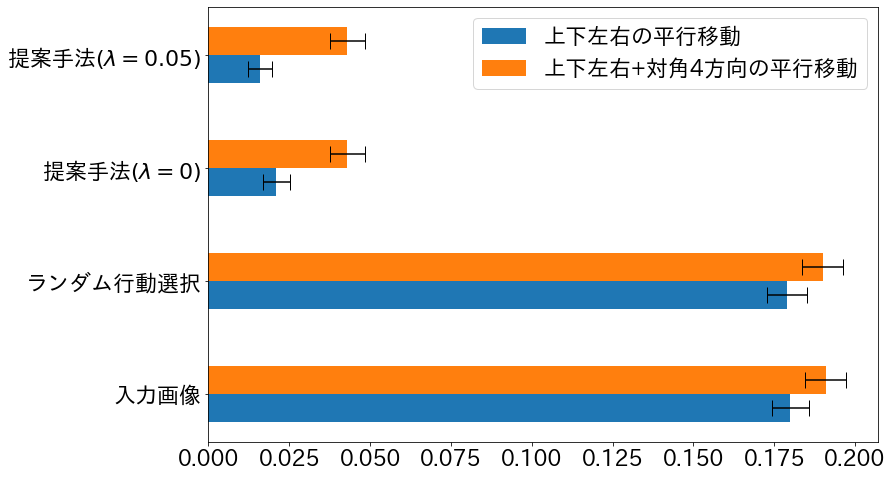

In [11]:
labels = ['入力画像', 'ランダム行動選択', '提案手法$(\lambda = 0)$', '提案手法$(\lambda = 0.05)$']
results = np.array([
    [0.18, 0.179, 0.021, 0.016],
    [0.191, 0.190, 0.043, 0.043]
])
xerr = [
    [0.0058, 0.0061, 0.0042, 0.0037],
    [0.0063, 0.0064, 0.0053, 0.0053]
]

plt.rc('font', **{'size': 22})
plt.figure(figsize=(12, 8))
y = np.arange(4)
plt.barh(y, results[0], xerr=xerr[0], height=0.25, align='edge', label='上下左右の平行移動', capsize=8)
plt.barh(y+0.25, results[1], xerr=xerr[1], height=0.25, align='edge', label='上下左右+対角4方向の平行移動', capsize=8)
plt.yticks(y+0.25, labels)
plt.legend()
plt.show()